# 1. 환경설정

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns



In [4]:
# 지수표현 없애기
pd.options.display.float_format = '{:.2f}'.format

# 2. 데이터 불러오기 및 전처리


## 2-1. 노출 관련 테이블

In [5]:
processed_school_path = 'dumps/processed/processed_accounts_school.csv'
processed_user_contacts_path = 'dumps/processed/processed_accounts_user_contacts.csv'
processed_school = pd.read_csv(processed_school_path)
processed_user_contacts = pd.read_csv(processed_user_contacts_path)

In [6]:
processed_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5951 non-null   int64 
 1   address           5951 non-null   object
 2   student_count     5951 non-null   int64 
 3   school_type       5951 non-null   object
 4   address_clean     5948 non-null   object
 5   is_active_school  5951 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 238.4+ KB


In [7]:
# 전처리
processed_school['id'] = processed_school['id'].astype(str) # id 고유값 문자형 변환
processed_school.rename(columns={'id': 'school_id'}, inplace=True) # id 컬럼 이름 변경

In [8]:
processed_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   school_id         5951 non-null   object
 1   address           5951 non-null   object
 2   student_count     5951 non-null   int64 
 3   school_type       5951 non-null   object
 4   address_clean     5948 non-null   object
 5   is_active_school  5951 non-null   bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 238.4+ KB


In [9]:
processed_school.head()

,school_id,address,student_count,school_type,address_clean,is_active_school
0,4,충청북도 충주시,239,H,충청북도 충주시,True
1,5,충청북도 충주시,160,M,충청북도 충주시,True
2,6,충청북도 충주시,200,H,충청북도 충주시,True
3,7,충청북도 충주시,114,H,충청북도 충주시,True
4,8,충청북도 충주시,139,M,충청북도 충주시,True


In [10]:
processed_user_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5063 non-null   int64 
 1   user_id              5063 non-null   int64 
 2   contacts_count       5063 non-null   int64 
 3   invite_user_id_list  1158 non-null   object
 4   invite_cnt           5063 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 197.9+ KB


In [11]:
# 전처리
import ast
def convert_to_list(x):
    try:
        if pd.isna(x) or x == "": return []
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

processed_user_contacts['invite_user_id_list'] = processed_user_contacts['invite_user_id_list'].apply(convert_to_list) # 리스트인척 하는 문자열을 진짜 리스트로 변환
processed_user_contacts['user_id'] = processed_user_contacts['user_id'].astype(str) # id 문자열 형변환
processed_user_contacts.drop(columns='id', inplace=True) # 불필요한 컬럼 제거
processed_user_contacts.rename(columns={'invite_cnt': 'invite_count'}, inplace=True) # 컬럼 이름 변경

## 2-2. 유입 관련 테이블

In [99]:
processed_user_path = 'dumps/processed/processed_accounts_user.csv'
processed_user = pd.read_csv(processed_user_path)

In [100]:
processed_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676978 entries, 0 to 676977
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             676978 non-null  int64  
 1   gender              676978 non-null  object 
 2   point               676978 non-null  int64  
 3   friend_id_list      674111 non-null  object 
 4   is_push_on          676978 non-null  int64  
 5   created_at          676978 non-null  object 
 6   block_user_id_list  676978 non-null  object 
 7   hide_user_id_list   676978 non-null  object 
 8   ban_status          676978 non-null  object 
 9   report_count        676978 non-null  int64  
 10  alarm_count         676978 non-null  int64  
 11  pending_chat        676978 non-null  int64  
 12  pending_votes       676978 non-null  int64  
 13  group_id            676978 non-null  float64
 14  friend_count        676978 non-null  int64  
dtypes: float64(1), int64(8), object(6)

In [103]:
# 전처리
processed_user['created_at'] = pd.to_datetime(processed_user['created_at']).dt.floor('s')
processed_user['user_id'] = processed_user['user_id'].astype(str)
processed_user['group_id'] = processed_user['group_id'].astype(str).str.split('.').str[0]

In [104]:
processed_user['group_id'].head()

0    12
1     1
2     1
3    12
4    12
Name: group_id, dtype: object

In [82]:
# 기간 설정
timeframe_user_condition = processed_user['created_at'].between('2023-05-13', '2024-05-07')
processed_user = processed_user[timeframe_user_condition]

In [83]:
processed_user.describe()

,point,is_push_on,created_at,report_count,alarm_count,pending_chat,pending_votes,friend_count
count,363134.00,363134.00,363134,363134.00,363134.00,363134.00,363134.00,363134.00
mean,1614.57,0.84,2023-05-23 01:52:50.418644224,0.03,0.88,0.08,66.43,48.09
min,0.00,0.00,2023-05-13 00:00:02,0.00,0.00,-1.00,0.00,0.00
25%,383.00,1.00,2023-05-15 17:40:44.249999872,0.00,1.00,0.00,1.00,27.00
50%,912.00,1.00,2023-05-19 19:46:40.500000,0.00,1.00,0.00,17.00,43.00
75%,2096.00,1.00,2023-05-24 13:39:24.249999872,0.00,1.00,0.00,89.00,64.00
max,206081.00,1.00,2024-05-06 22:48:40,57.00,238.00,256.00,2744.00,1373.00
std,2170.49,0.36,NaN,0.33,0.95,0.64,106.41,30.90


## 2-3. 참여 관련 테이블

In [17]:
userquestion_path = 'dumps/processed/processed_userquestionrecord.csv'
processed_questionrecord = pd.read_csv(userquestion_path)

In [18]:
processed_questionrecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   question_id        1217558 non-null  int64 
 1   status             1217558 non-null  object
 2   created_at         1217558 non-null  object
 3   chosen_user_id     1217558 non-null  int64 
 4   question_id.1      1217558 non-null  int64 
 5   user_id            1217558 non-null  int64 
 6   question_piece_id  1217558 non-null  int64 
 7   has_read           1217558 non-null  int64 
 8   answer_status      1217558 non-null  object
 9   answer_updated_at  1217558 non-null  object
 10  report_count       1217558 non-null  int64 
 11  opened_times       1217558 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 111.5+ MB


In [19]:
# 기본 전처리
processed_questionrecord['created_at'] = pd.to_datetime(processed_questionrecord['created_at']).dt.floor('s')
processed_questionrecord['chosen_user_id'] = processed_questionrecord['chosen_user_id'].astype(str)
processed_questionrecord['question_id'] = processed_questionrecord['question_id'].astype(str)
processed_questionrecord['user_id'] = processed_questionrecord['user_id'].astype(str)
processed_questionrecord['question_piece_id'] = processed_questionrecord['question_piece_id'].astype(str)

In [20]:
# 기간 설정
timeframe_questionrecord_condition = processed_questionrecord['created_at'].between('2023-05-13', '2024-05-07')
processed_questionrecord = processed_questionrecord[timeframe_questionrecord_condition]

In [21]:
processed_questionrecord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809924 entries, 407619 to 1217542
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   question_id        809924 non-null  object        
 1   status             809924 non-null  object        
 2   created_at         809924 non-null  datetime64[ns]
 3   chosen_user_id     809924 non-null  object        
 4   question_id.1      809924 non-null  int64         
 5   user_id            809924 non-null  object        
 6   question_piece_id  809924 non-null  object        
 7   has_read           809924 non-null  int64         
 8   answer_status      809924 non-null  object        
 9   answer_updated_at  809924 non-null  object        
 10  report_count       809924 non-null  int64         
 11  opened_times       809924 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 80.3+ MB


In [22]:
processed_questionrecord.head()

,question_id,status,created_at,chosen_user_id,question_id.1,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
407619,30765918,C,2023-05-13 00:00:00,1155081,587,1145821,40639210,1,N,2023-05-12 15:00:00,0,0
407620,30765978,C,2023-05-13 00:00:01,1161706,154,1101060,40711246,1,N,2023-05-12 15:00:01,0,0
407621,30766127,C,2023-05-13 00:00:03,1131024,386,1115705,40341153,0,N,2023-05-12 15:00:03,0,0
407622,30766245,C,2023-05-13 00:00:04,1129662,422,945848,39510495,0,N,2023-05-12 15:00:04,0,0
407623,30766423,C,2023-05-13 00:00:06,1104366,564,1101060,40711252,1,A,2023-05-12 15:33:37,0,0


## 2-4. 수익관련 테이블

In [23]:
processed_payment_path = 'dumps/processed/processed_accounts_paymenthistory.csv'
processed_payment = pd.read_csv(processed_payment_path)
processed_failpayment_path = 'dumps/processed/processed_accounts_failpaymenthistory.csv'
processed_failpayment = pd.read_csv(processed_failpayment_path)

In [24]:
processed_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95140 entries, 0 to 95139
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     95140 non-null  int64 
 1   productId   95140 non-null  object
 2   phone_type  95140 non-null  object
 3   created_at  95140 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [25]:
processed_failpayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          160 non-null    int64 
 1   user_id     160 non-null    int64 
 2   productId   56 non-null     object
 3   phone_type  160 non-null    object
 4   created_at  160 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.4+ KB


In [26]:
# 기본 전처리
processed_payment['created_at'] = pd.to_datetime(processed_payment['created_at']).dt.floor('s')
processed_payment['user_id'] = processed_payment['user_id'].astype(str)
# 상품명 하트수(숫자)로 변환
product_map = {
    'heart.777': 777,
    'heart.200': 200,
    'heart.4000': 4000,
    'heart.1000': 1000
}
processed_payment['productId'] = processed_payment['productId'].map(product_map)

processed_failpayment['created_at'] = pd.to_datetime(processed_failpayment['created_at']).dt.floor('s')
processed_failpayment['user_id'] = processed_failpayment['user_id'].astype(str)
processed_failpayment = processed_failpayment.drop(columns='id')

In [27]:
# 기간 설정
timeframe_payment_condition = processed_payment['created_at'].between('2023-05-13', '2024-05-07')
processed_payment = processed_payment[timeframe_payment_condition]

In [28]:
processed_payment.info()
print('=' * 10)
processed_failpayment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95136 entries, 0 to 95135
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     95136 non-null  object        
 1   productId   95136 non-null  int64         
 2   phone_type  95136 non-null  object        
 3   created_at  95136 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     160 non-null    object        
 1   productId   56 non-null     object        
 2   phone_type  160 non-null    object        
 3   created_at  160 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 5.1+ KB


# 3. 데이터 파악

## 3-1. 퍼널 전환율

### 3-1-1. 노출

In [29]:
processed_user_contacts.head()

,user_id,contacts_count,invite_user_id_list,invite_count
0,1167696,30,[],0
1,863169,79,[],0
2,857205,21,[854615],1
3,851431,29,[],0
4,855476,28,[849318],1


In [30]:
processed_user_contacts.describe()

,contacts_count,invite_count
count,5063.00,5063.00
mean,25.99,0.33
std,13.60,0.75
min,0.00,0.00
25%,16.00,0.00
50%,24.00,0.00
75%,34.00,0.00
max,114.00,10.00


In [31]:
# 유저당 초대받았던 기록의 합계
processed_user_contacts['invite_count'].sum()

np.int64(1687)

In [32]:
# 이 유저의 연락처를 가지고있는 사람들 중 실제로 초대를 받은 비율
invite_ratio = processed_user_contacts['invite_count'] / processed_user_contacts['contacts_count'] * 100
invite_ratio.describe()

count   5060.00
mean       1.21
std        3.06
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      100.00
dtype: float64

In [33]:
# 100%가 어케나와요
processed_user_contacts.iloc[invite_ratio.idxmax()]

user_id                  945228
contacts_count                1
invite_user_id_list    [887254]
invite_count                  1
Name: 2753, dtype: object

In [34]:
invite_ratio.value_counts()
# 전체 5059명 중 연락처 대비 초대수가 없거나, 초대를 받지 않은 유저는 3902명

0.00     3902
4.35       42
4.76       42
3.85       36
5.56       32
         ... 
10.20       1
24.32       1
8.11        1
6.12        1
6.17        1
Name: count, Length: 143, dtype: int64

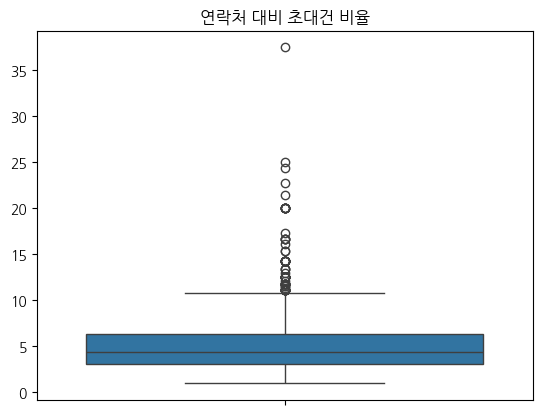

In [35]:
# 50% 이상: 이상치,0%: 결측치로 정의, 제외하고 그래프 확인
invite_condition = (invite_ratio > 0) & (invite_ratio <= 50)
plt.figure()
sns.boxplot(
    data=invite_ratio[invite_condition]
)
plt.title('연락처 대비 초대건 비율')
plt.show()

In [36]:
# 연락처 대비 초대건 비율의 평균을 5%로 계산
print(f"한 사람당 가지고 있는 연락처의 평균 중 초대하는 사람 수: {(processed_user_contacts['contacts_count'].mean()) * 0.05:.2f}")
print(f"유저의 전체 연락처 중 초대 가능성이 있는 수: {(processed_user_contacts['contacts_count'].sum()) * 0.05 * ((5059 - 3902) / 5059):.2f}")
# 한 사람 당 평균 1.3명 초대한다고 볼 수 있음
# 약간 1+1 느낌이네

한 사람당 가지고 있는 연락처의 평균 중 초대하는 사람 수: 1.30
유저의 전체 연락처 중 초대 가능성이 있는 수: 1504.49


### 3-1-2. 유입

- 활성화된 학교/학급에 해당되는 유저들만 추출

In [37]:
# 활성화 학교 리스트 추출
active_school_id_list = processed_school[processed_school['student_count'] >= 40]['school_id'].unique()

-----

In [71]:
# 학급 테이블 추가
group_path = 'dumps/raw_vote_csv/accounts_group.csv'
raw_group = pd.read_csv(group_path)

In [72]:
raw_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84515 entries, 0 to 84514
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         84515 non-null  int64
 1   grade      84515 non-null  int64
 2   class_num  84515 non-null  int64
 3   school_id  84515 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB


In [73]:
raw_group.head()

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1


In [74]:
# 전처리
processed_group = raw_group.copy()
processed_group['id'] = processed_group['id'].astype(str)
processed_group.rename(columns={'id':'group_id'}, inplace=True)
processed_group['school_id'] = processed_group['school_id'].astype(str)

In [106]:
processed_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84515 entries, 0 to 84514
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   group_id   84515 non-null  object
 1   grade      84515 non-null  int64 
 2   class_num  84515 non-null  int64 
 3   school_id  84515 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.6+ MB


In [75]:
# 활성화 학급 필터링
active_school_group = processed_group[processed_group['school_id'].isin(active_school_id_list)]
active_school_group

,group_id,grade,class_num,school_id
9,19,1,1,2380
10,20,2,3,281
11,21,1,1,281
13,23,3,5,271
16,26,1,2,4185
...,...,...,...,...
84509,84541,3,1,5270
84510,84542,3,2,5107
84511,84543,2,7,3487
84513,84545,2,7,416


In [76]:
active_school_group.groupby(['school_id', 'grade', 'class_num']).size().reset_index()

,school_id,grade,class_num,0
0,10,2,1,1
1,10,2,2,1
2,10,2,3,1
3,10,2,4,1
4,10,2,5,1
...,...,...,...,...
74744,999,3,5,1
74745,999,3,6,1
74746,999,3,7,1
74747,999,3,8,1


In [77]:
# ㅋㅎ ㅋ봑치게하네
active_school_group.groupby(['school_id', 'grade', 'class_num']).agg(count=('class_num', 'count')).reset_index().sort_values('count')

,school_id,grade,class_num,count
0,10,2,1,1
49834,4632,2,5,1
49833,4632,2,4,1
49832,4632,2,3,1
49831,4632,2,2,1
...,...,...,...,...
45449,4383,1,4,2
69555,5900,3,1,2
45459,4383,3,1,2
69519,5899,1,1,2


-----

In [84]:
processed_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363134 entries, 13299 to 676968
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   user_id             363134 non-null  object        
 1   gender              363134 non-null  object        
 2   point               363134 non-null  int64         
 3   friend_id_list      360450 non-null  object        
 4   is_push_on          363134 non-null  int64         
 5   created_at          363134 non-null  datetime64[ns]
 6   block_user_id_list  363134 non-null  object        
 7   hide_user_id_list   363134 non-null  object        
 8   ban_status          363134 non-null  object        
 9   report_count        363134 non-null  int64         
 10  alarm_count         363134 non-null  int64         
 11  pending_chat        363134 non-null  int64         
 12  pending_votes       363134 non-null  int64         
 13  group_id            363134 non

In [ ]:
# user 테이블 중 필요한 컬럼만 추출하여 활성화된 학교/학급 테이블과 merge
user_group_merge = pd.merge(processed_user[['user_id', 'group_id']], active_school_group, on='group_id')

In [111]:
user_group_merge.head()

,user_id,group_id,grade,class_num,school_id
0,833024,35,1,10,5464
1,833041,149,3,1,314
2,833112,37,3,1,281
3,833113,38,1,3,272
4,833154,61,1,12,272


In [ ]:
# user_id를 기준으로 학교/학년/학급별 활성화 조건 필터링
# 진짜 활성화된 학교/학년/학급에 대한 데이터프레임(목록) 생성
user_group_merge_count = user_group_merge.groupby(['school_id', 'grade', 'class_num']).agg(count=('user_id', 'count')).reset_index()
active_group_condition = user_group_merge_count['count'] >= 4
user_group_merge_count[active_group_condition]

,school_id,grade,class_num,count
0,10,2,1,17
1,10,2,2,11
2,10,2,3,15
3,10,2,4,21
4,10,2,5,16
...,...,...,...,...
72075,999,3,5,13
72076,999,3,6,8
72077,999,3,7,8
72078,999,3,8,7


In [118]:
# user_id가 포함된 원본 데이터프레임에 활성화 목록과 같은 학교/학년/학급만 남김
active_groups = user_group_merge_count[active_group_condition][['school_id', 'grade', 'class_num']]
active_user = pd.merge(user_group_merge, active_groups, on=['school_id', 'grade', 'class_num'])
# 진짜 활성화된 유저 리스트 추출
acquisition_user_list = active_user['user_id'].unique()

In [ ]:
# 원본 user table에 필터링하여 활성화 유저 추출
acquisition_user = processed_user[processed_user['user_id'].isin(acquisition_user_list)]

In [122]:
acquisition_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626239 entries, 10 to 676974
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   user_id             626239 non-null  object        
 1   gender              626239 non-null  object        
 2   point               626239 non-null  int64         
 3   friend_id_list      624823 non-null  object        
 4   is_push_on          626239 non-null  int64         
 5   created_at          626239 non-null  datetime64[ns]
 6   block_user_id_list  626239 non-null  object        
 7   hide_user_id_list   626239 non-null  object        
 8   ban_status          626239 non-null  object        
 9   report_count        626239 non-null  int64         
 10  alarm_count         626239 non-null  int64         
 11  pending_chat        626239 non-null  int64         
 12  pending_votes       626239 non-null  int64         
 13  group_id            626239 non-nu

In [123]:
processed_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676978 entries, 0 to 676977
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   user_id             676978 non-null  object        
 1   gender              676978 non-null  object        
 2   point               676978 non-null  int64         
 3   friend_id_list      674111 non-null  object        
 4   is_push_on          676978 non-null  int64         
 5   created_at          676978 non-null  datetime64[ns]
 6   block_user_id_list  676978 non-null  object        
 7   hide_user_id_list   676978 non-null  object        
 8   ban_status          676978 non-null  object        
 9   report_count        676978 non-null  int64         
 10  alarm_count         676978 non-null  int64         
 11  pending_chat        676978 non-null  int64         
 12  pending_votes       676978 non-null  int64         
 13  group_id            676978 no

In [124]:
# 1. 필터링 전후의 '학교-학년-반' 조합 개수 비교
print(f"전체 그룹 조합 수: {len(user_group_merge.groupby(['school_id', 'grade', 'class_num']))}")
print(f"조건 통과 그룹 조합 수: {len(active_groups)}")

# 2. 살아남은 유저들 중 랜덤으로 한 반을 골라서 진짜 4명 이상인지 확인
sample_group = active_user.sample(1)[['school_id', 'grade', 'class_num']]
check_count = active_user[
    (active_user['school_id'] == sample_group.iloc[0,0]) & 
    (active_user['grade'] == sample_group.iloc[0,1]) & 
    (active_user['class_num'] == sample_group.iloc[0,2])
]
print(f"샘플 그룹의 인원수: {len(check_count)}명 (4명 이상이어야 함)")

# 3. 누락된(필터링 된) 유저들은 몇 명인가?
print(f"필터링 된 유저 수: {676978 - 626239}명")

전체 그룹 조합 수: 72080
조건 통과 그룹 조합 수: 55251
샘플 그룹의 인원수: 16명 (4명 이상이어야 함)
필터링 된 유저 수: 50739명
